# Predict Graduate Admissions
* The Dataset source  : Kaggle (https://www.kaggle.com/mohansacharya/graduate-admissions/home).
 Shweta Kanhere

##  Aim : Prediction of Graduate Admissions Using SVR Model

#####  About dataset : 
This dataset contains several parameters which are considered important during the application for graduate Programs. The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

In [60]:
## Load the Libraries 

### Pandas and Numpy
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
### To save the model
import pickle

In [2]:
# load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [16]:
df.head()

,GRE_S,TOEFL_S,rating,sop,lor,gpa,research,chance_Of_admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
print('Shape of the data is:')
df.shape

Shape of the data is:


(500, 8)

In [18]:
print('Information of the data is:')
df.info()

Information of the data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_S                500 non-null    int64  
 1   TOEFL_S              500 non-null    int64  
 2   rating               500 non-null    int64  
 3   sop                  500 non-null    float64
 4   lor                  500 non-null    float64
 5   gpa                  500 non-null    float64
 6   research             500 non-null    int64  
 7   chance_Of_admission  500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [19]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


GRE_S                  0
TOEFL_S                0
rating                 0
sop                    0
lor                    0
gpa                    0
research               0
chance_Of_admission    0
dtype: int64

#### Column names are not proper like :
*Serial No. ,Chance of Admit etc. We need to remove the spaces
*Serial No has Full stop so we need to remove this and chance as no (Serial No.=no)
*Need to change the other variable into lowercase for easy to use

In [20]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'GRE_S','TOEFL Score':'TOEFL_S','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa',
                           'Research':'research','Chance of Admit ':'chance_Of_admission'})

In [21]:
df

,GRE_S,TOEFL_S,rating,sop,lor,gpa,research,chance_Of_admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Check the data type of the columns

In [22]:
df.dtypes

GRE_S                    int64
TOEFL_S                  int64
rating                   int64
sop                    float64
lor                    float64
gpa                    float64
research                 int64
chance_Of_admission    float64
dtype: object

#  Data Exploration

In [23]:
print("The basic statistics of the data")
df.describe().T

The basic statistics of the data


,count,mean,std,min,25%,50%,75%,max
GRE_S,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_S,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
sop,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
lor,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
gpa,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
chance_Of_admission,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Data Visualization

* This gives clearity about data

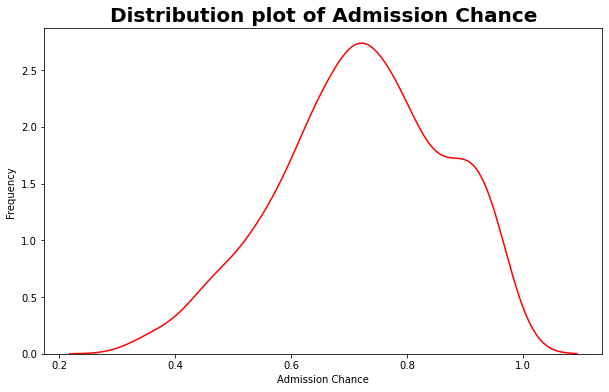

In [24]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(df['chance_Of_admission'],color="red")
plt.title('Distribution plot of Admission Chance',fontsize=20,fontweight="bold")
plt.xlabel('Admission Chance')
plt.ylabel('Frequency ')
plt.show()

In [52]:
numerical_features=df.columns
print(numerical_features)


Index(['GRE_S', 'TOEFL_S', 'rating', 'sop', 'lor', 'gpa', 'research',
       'chance_Of_admission'],
      dtype='object')


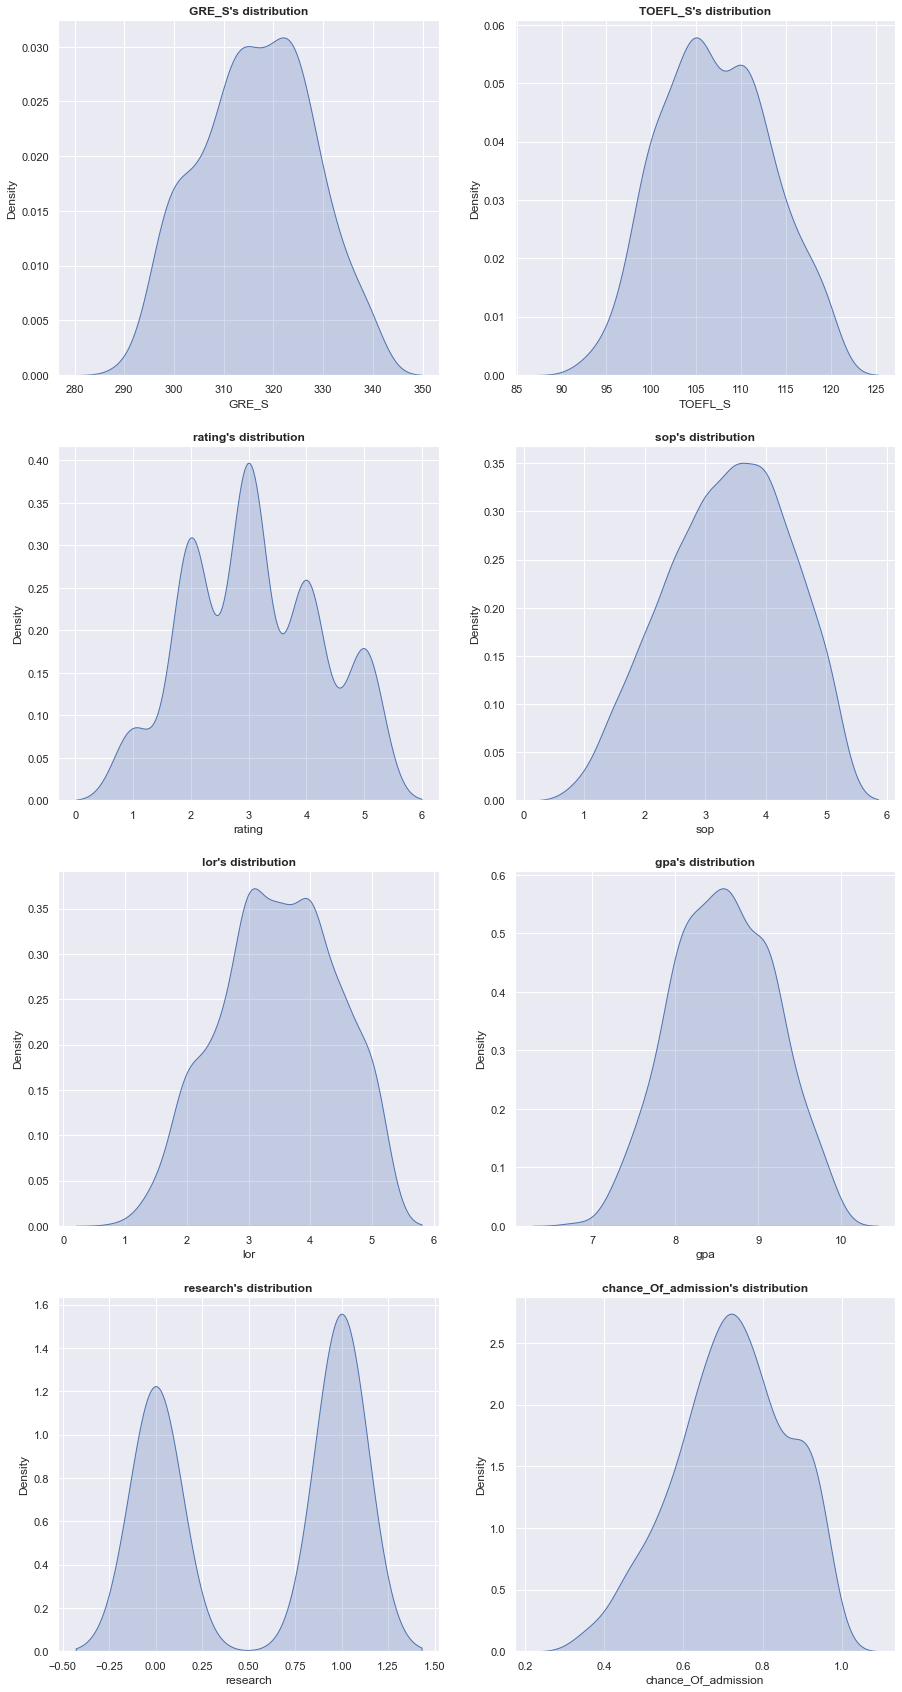

In [55]:
plt.figure(figsize=(15,30))
for i in enumerate(numerical_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.kdeplot(data=df, x=i[1], fill=True)
    plt.title("{}'s distribution".format(i[1]),fontweight="bold")


# Data Preperation

* here in data set all variables are numerical 
* consider chance_Of_admission dependent variable and others are independent variables
* The model will predict chance_Of_admission with the help of other variables (ie. predictors)
* drop the no column as it has no impact on dataset


In [26]:
X=df.drop(['no'],axis=1,inplace=True)

KeyError: "['no'] not found in axis"

In [13]:
df.columns

Index(['GRE_S', 'TOEFL_S', 'rating', 'sop', 'lor', 'gpa', 'research',
       'chance_Of_admission'],
      dtype='object')

In [27]:
X=df.drop("chance_Of_admission",axis=1)
y=df['chance_Of_admission']


In [28]:
X

,GRE_S,TOEFL_S,rating,sop,lor,gpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [30]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: chance_Of_admission, dtype: float64

#### Data will be splitted using train_test_split module of scikitlearn library 
* Ref :https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]
* Here test size taken as 20% of data (80-20 ratio of train-test).

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=10)

In [84]:
y_train.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: chance_Of_admission, dtype: float64

In [85]:
X_test.head()


,GRE_S,TOEFL_S,rating,sop,lor,gpa,research
151,332,116,5,5.0,5.0,9.28,1
424,325,114,5,4.0,5.0,9.46,1
154,326,108,3,3.0,3.5,8.89,0
190,324,111,5,4.5,4.0,9.16,1
131,303,105,5,5.0,4.5,8.65,0


In [86]:
y_test.head()


151    0.94
424    0.91
154    0.80
190    0.90
131    0.77
Name: chance_Of_admission, dtype: float64

In [87]:
### both will have same shape
X_train.shape, y_train.shape

((375, 7), (375,))

In [88]:
### both will have same shape
X_test.shape, y_test.shape


((125, 7), (125,))

# Transforming data

In [89]:
X_train=scaler.fit_transform(X_train)
X_train
X_test=scaler.transform(X_test)
X_test

array([[ 0.84      ,  0.85185185,  1.        ,  1.        ,  1.        ,
         0.79487179,  1.        ],
       [ 0.7       ,  0.77777778,  1.        ,  0.75      ,  1.        ,
         0.8525641 ,  1.        ],
       [ 0.72      ,  0.55555556,  0.5       ,  0.5       ,  0.625     ,
         0.66987179,  0.        ],
       [ 0.68      ,  0.66666667,  1.        ,  0.875     ,  0.75      ,
         0.75641026,  1.        ],
       [ 0.26      ,  0.44444444,  1.        ,  1.        ,  0.875     ,
         0.59294872,  0.        ],
       [ 0.6       ,  0.40740741,  0.5       ,  0.5       ,  0.625     ,
         0.62179487,  1.        ],
       [ 0.44      ,  0.44444444,  0.25      ,  0.25      ,  0.375     ,
         0.52884615,  0.        ],
       [ 0.84      ,  0.55555556,  1.        ,  0.875     ,  0.75      ,
         0.71153846,  1.        ],
       [ 0.38      ,  0.40740741,  0.25      ,  0.25      ,  0.375     ,
         0.46794872,  0.        ],
       [ 0.44      ,  0.4814

# Building SVR Model

In [90]:
svr=SVR()
svr


SVR()

In [91]:
svr.fit(X_train,y_train)


SVR()

In [92]:
svr_pred=svr.predict(X_test)
svr_pred


array([0.8530122 , 0.85878143, 0.66607036, 0.85201859, 0.73296598,
       0.74516515, 0.650184  , 0.85113676, 0.61194738, 0.73690793,
       0.87287702, 0.80851996, 0.85861529, 0.67264923, 0.81073542,
       0.75034243, 0.6806016 , 0.69774459, 0.74521387, 0.6272066 ,
       0.73314907, 0.62810708, 0.61362472, 0.86126621, 0.46746224,
       0.85398424, 0.73538769, 0.53381885, 0.66666846, 0.68324957,
       0.8714581 , 0.80858066, 0.57285162, 0.64223422, 0.73241553,
       0.86233993, 0.82526655, 0.66318999, 0.66729112, 0.69183415,
       0.85989873, 0.6118147 , 0.68574295, 0.86433997, 0.87314784,
       0.49975215, 0.57019248, 0.65968592, 0.78727405, 0.73433589,
       0.79588108, 0.6964019 , 0.56604054, 0.61040253, 0.66226745,
       0.80022019, 0.83315883, 0.61114315, 0.70476323, 0.85566571,
       0.62349619, 0.8243358 , 0.7545564 , 0.50881424, 0.83502712,
       0.49569389, 0.73047824, 0.74484777, 0.51781424, 0.70395694,
       0.8886297 , 0.55082174, 0.58351099, 0.73627234, 0.70385

In [93]:
svr_r2_score=r2_score(y_test, svr_pred)
print("The Support Vector Regressor model has {} % accuracy".format(round(svr_r2_score*100,3)))


The Support Vector Regressor model has 74.322 % accuracy


In [94]:
adjusted_r2_score=1-((1-svr_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(" The Adjusted R square accuracy is {} % ".format(round(adjusted_r2_score*100,3)))


 The Adjusted R square accuracy is 72.786 % 


#  Observations :
* The Support Vector Regressor model has 74.322 % accuracy
* The Adjusted R square accuracy is 72.786 % 


In [ ]:
END